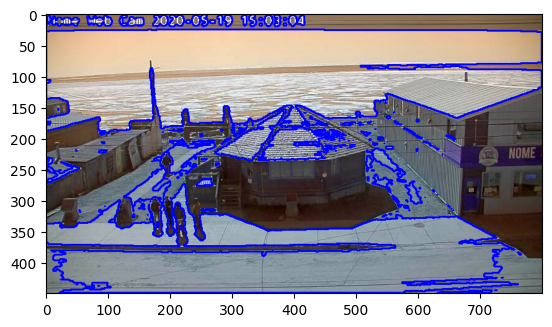

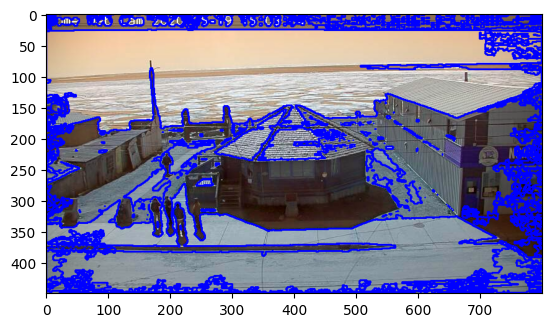

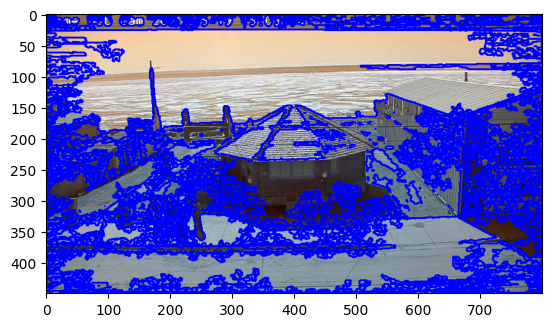

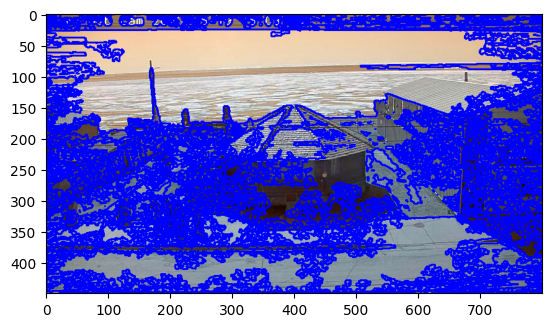

In [5]:
#Our whole team worked on this algorithm together so there might be similarities between the code

import sys
import numpy as np
import cv2
import pdb
import math
from pylab import*

def sobel_edge_detection(image):
   # Kernel used for calculating gradient
   Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
   Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


   # save image dimensions
   rows, cols = image.shape


   # Initializing the np arrays for gradient
   grad_x = np.zeros((rows, cols))
   grad_y = np.zeros((rows, cols))


   # Compute gradients
   for i in range(1, rows - 1):
       for j in range(1, cols - 1):
           region = image[i-1:i+2, j-1:j+2]
           grad_x[i, j] = np.sum(Gx * region)
           grad_y[i, j] = np.sum(Gy * region)


   # Compute magnitude of gradient
   grad_mag = np.sqrt(grad_x**2 + grad_y**2)


   # Normalize gardient
   grad_x = grad_x / (grad_mag + 1e-6)
   grad_y = grad_x / (grad_mag + 1e-6)


   # returns gradient x, gradient y
   return grad_x, grad_y


def active_contour(LevelSetFunction, image, mu_coeff, nu_coeff, epsilon, iteration_step):


   # Calculate the Dirac delta function and Heaviside approximation
   Dirac_app = (epsilon / math.pi) / (epsilon**2 + LevelSetFunction**2)
   Heaviside_app = 0.5 * (1 + (2 / math.pi) * np.arctan(LevelSetFunction / epsilon))


   # Compute gradient x and gradient y and grad magnitude
   grad_y, grad_x = sobel_edge_detection(LevelSetFunction)


   # Compuate second derivative
   curvature_x, _ = np.gradient(grad_x)
   curvature_y, _ = np.gradient(grad_y)
   curvature = curvature_x + curvature_y


   # Calculate the length term
   length_term = nu_coeff * Dirac_app * curvature


   # Calculate fitting terms
   fitting_term1 = Heaviside_app * image
   fitting_term2 = (1 - Heaviside_app) * image
   fitting_term3 = 1 - Heaviside_app


   # Compute the laplacian and penalty term
   Laplacian = cv2.Laplacian(LevelSetFunction, cv2.CV_64F)
   penalty_term = mu_coeff * (Laplacian - curvature)




   # Compute average intensities inside and outside the contour
   avg_intensity_inside = fitting_term1.sum() / Heaviside_app.sum()
   avg_intensity_outside = fitting_term2.sum() / fitting_term3.sum()


   # Compute active contour term
   active_contour_term = Dirac_app * (-1 * (image - avg_intensity_inside)**2 + (image - avg_intensity_outside)**2)


   # Update the level set function
   LevelSetFunction += iteration_step * (length_term + penalty_term + active_contour_term)


   return LevelSetFunction


# Helper function to calculate arc taan and sqauar root
def matric_calculation(intput,str):
   # set output to input
   output=intput
   # looping over rows
   for i in range(gray_image.shape[0]):
       # looping over columns
       for j in range(gray_image.shape[1]):
           # if str = atan, perform arc tan opperation
           if str=="atan":
               output[i,j] = math.atan(intput[i,j])
           # if str = sqrt, perform sqrt opperation
           if str=="sqrt":
               output[i,j] = math.sqrt(intput[i,j])
   return output


if __name__ == '__main__':

  # Read image
  image = cv2.imread('Intersec.jpg')
  # convert it to array
  image_array = np.array(image)


  # convert it to gray scale
  gray_image = 0.2126 * image_array[:,:,2] + 0.7152 * image_array[:,:,1] + 0.0722 * image_array[:,:,0]
  height, width = gray_image.shape
  # Apply Gaussian Bluring
  filterd_image = cv2.GaussianBlur(gray_image, (5, 5),5)


  # Initialize contour with value 1 and other with -1
  initial_contour = np.ones((filterd_image.shape[0],filterd_image.shape[1]),filterd_image.dtype)
  initial_contour[int(height/2):int(height/2)+10,int(width/2-20):int(width/2-20)+10]= -1
  initial_contour=-initial_contour




# Set up parameters for compute active contour
mu = 1
nu = 0.003 * 255 * 255
num =5
epsilon = 1
step = 0.1

LSF=initial_contour


 # itterate through number of itteration
for i in range(1, num):
     # output Chan Vese contour
     LSF = active_contour(LSF, filterd_image, mu, nu, epsilon, step)
     # set the threshold value with mean of contour
     tresh_hold = np.mean(LSF)
     if i % 1 == 0:
         # set RGB image for display with contour
         display_image = image_array
         # Find contours from output of Chan Vese algorithm with taking thresholding
         contours, _ = cv2.findContours((LSF > tresh_hold).astype(np.uint8),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
         # Draw contours for display
         cv2.drawContours(display_image, contours, -1, (0 ,0, 255), 2)



         # Display the image with contours
         cv2.imwrite(f'Active Contour{i}.jpg', display_image)
